In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [44]:
#Simulation r_a = 0:

sigma_c=1
r_c=1/57
v=1

m=np.zeros(21)
cov=np.zeros((21,21))
for s in range(21):
    cov[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s)/sigma_c))
    for t in range(s):
        cov[t,s]=cov[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)
        

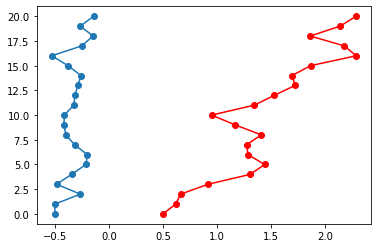

In [46]:
#visualisation des trajectoires


X1 = np.random.multivariate_normal(m, cov)-0.5
X2 = np.random.multivariate_normal(m, cov)+0.5

Y=np.arange(0,21)

plt.plot(X1,Y,marker="o")

plt.plot(X2,Y,'red',marker="o")

plt.show()

In [ ]:
#visualisation des trajectoires


X1 = np.random.multivariate_normal(m, cov)-0.5
X2 = np.random.multivariate_normal(m, cov)+0.5

Y=np.arange(0,21)

plt.plot(X1,Y,marker="o")

plt.plot(X2,Y,'red',marker="o")

plt.show()

In [47]:
#MC Naïf

d=1 #distance entre les deux avions - trajectoire parallèle
N=100000

m=np.zeros(20)
cov=np.zeros((20,20))
for s in range(20):
    cov[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s+1)/sigma_c))
    for t in range(s):
        cov[t,s]=cov[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t+1)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)
        
X = np.random.multivariate_normal(m, cov,size=N)-d/2
Y = np.random.multivariate_normal(m, cov,size=N)+d/2
Z=np.min(abs(Y-X),axis=1)<0.1
print(np.mean(Z))

0.3172


In [6]:
#fonctions permettant de calculer des termes de la densité gaussienne

def xtcx(x,C):
    return(np.apply_along_axis(lambda x:np.dot(x.T,np.dot(C,x)),0,x))

def xtcy(x,C,y):
    return(np.apply_along_axis(lambda x:np.dot(x.T,np.dot(C,y)),0,x))

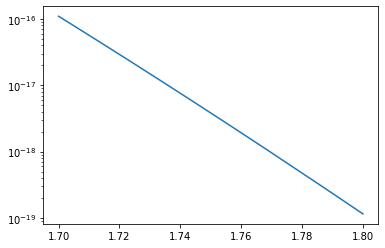

In [58]:
#choix optimal du changement de moyenne

d=3
N=20000
deltas = np.linspace(1.7,1.8,50)
l=[]
mu=np.zeros(20)+d
X = np.random.multivariate_normal(mu, cov,size=N)
Y = np.random.multivariate_normal(np.zeros(20), cov,size=N)
inv_C=np.linalg.inv(cov)
for delta in deltas:
    mu_=(mu-delta).reshape(20,1)
    X_=(X-delta).T
    Y_=Y.T
    Z=np.min(abs(X_-Y_),axis=0)<0.1
    mu=mu.reshape(20,1)
    r=np.exp(-0.5*(xtcx(X_-mu,inv_C)-xtcx(X_-mu_,inv_C)))
    l.append(np.mean((Z*r)**2))
#print(np.mean((Z*r))) 
plt.plot(deltas,l)
plt.yscale('log')
plt.show()

In [54]:
np.mean(r)

2.502452833735719e-34

In [59]:
#Changement de moyenne :

d=3
N=2000000
l=[]
mu=np.zeros(20)+d
X = np.random.multivariate_normal(mu, cov,size=N)
Y = np.random.multivariate_normal(np.zeros(20), cov,size=N)
inv_C=np.linalg.inv(cov)
delta=1.75
mu_=(mu-delta).reshape(20,1)
X_=(X-delta).T
Y_=Y.T
Z=np.min(abs(X_-Y_),axis=0)<0.1
mu=mu.reshape(20,1)
r=np.exp(0.5*(-xtcx(X_-mu,inv_C)+xtcx(X_-mu_,inv_C)))
print(np.mean((Z*r))) 


2.3387127875390148e-08


In [79]:
np.mean(Z)

0.1969315

In [80]:
np.mean(r)

1.072523053387142

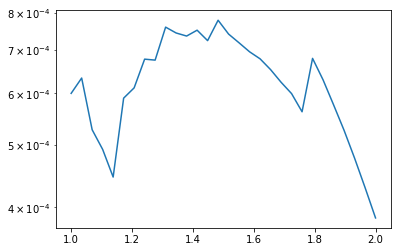

In [165]:
# Choix de alpha :


d=3.5
N=10000
alphas = np.linspace(1,2,30)
l=[]
mu=np.zeros(20)+d/2
X = np.random.multivariate_normal(mu, cov,size=N)
Y = np.random.multivariate_normal(-mu, cov,size=N)

for alpha in alphas:
    mu=np.zeros(20)+d/2
    X_=(((alpha)**0.5)*X+(1-(alpha)**0.5)*d/2).T
    Y_=Y.T
    mu=mu.reshape(20,1)
    Z=np.min(abs(X_-Y_),axis=0)<0.1
    inv_C=np.linalg.inv(cov)
    r=np.exp(0.5*(xtcx(X_-mu,(1/alpha-1)*inv_C)+20*np.log(alpha)))
    l.append(np.mean((Z*r)**2))
    
plt.plot(alphas,l)
plt.yscale('log')
plt.show()

In [29]:
np.mean(r)

0.9261065623509126

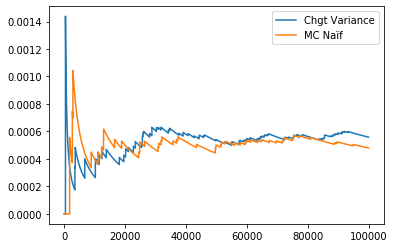

MC Naïf : 0.00048
Chgt variance : 0.000558381278926783


In [11]:
#Chgt de variance :
N=100000
d=3.5
mu=np.zeros(20)+d/2
cov=np.zeros((20,20))
for s in range(20):
    cov[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s+1)/sigma_c))
    for t in range(s):
        cov[t,s]=cov[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t+1)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)


alpha=1.1

X = np.random.multivariate_normal(mu, cov,size=N)
Y = np.random.multivariate_normal(-mu, cov,size=N)

X_=(((alpha)**0.5)*X+(1-(alpha)**0.5)*d/2).T
Y_=Y.T

mu=mu.reshape(20,1)
Z=np.min(abs(X_-Y_),axis=0)<0.1
inv_C=np.linalg.inv(cov)
r=np.exp(0.5*(xtcx(X_-mu,(1/alpha-1)*inv_C)+20*np.log(alpha)))
l=np.cumsum(Z*r)/np.arange(1,N+1)
plt.plot(np.arange(1,N+1),l,label='Chgt Variance')

#MC Naïf

mu=np.zeros(20)+d/2       
X = np.random.multivariate_normal(mu, cov,size=N)
Y = np.random.multivariate_normal(-mu, cov,size=N)
Y=np.min(abs(X-Y),axis=1)<0.1
vals=np.cumsum(Y)/np.arange(1,N+1)
plt.plot(np.arange(1,N+1),vals, label='MC Naïf')
plt.legend(loc='upper right')
plt.show()
print("MC Naïf :",np.mean(Y))
print("Chgt variance :", np.mean(Z*r))

In [13]:
np.mean(r)

0.99818117516662

In [142]:
#Chgt de variance pour les intervalles de confiance:
N=100000
d=5
mu=np.zeros(20)+d/2
cov=np.zeros((20,20))
for s in range(20):
    cov[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s+1)/sigma_c))
    for t in range(s):
        cov[t,s]=cov[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t+1)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)
        
inv_C=np.linalg.inv(cov)
alpha=2.8
mu=np.zeros(20)+d/2
X = np.random.multivariate_normal(mu, cov,size=N)
Y = np.random.multivariate_normal(-mu, cov,size=N)
X_=(((alpha)**0.5)*X+(1-(alpha)**0.5)*d/2).T
Y_=Y.T
mu=mu.reshape(20,1)
Z=np.min(abs(X_-Y_),axis=0)<0.1
r=np.exp(0.5*(xtcx(X_-mu,(1/alpha-1)*inv_C)+20*np.log(alpha))) 
print(np.mean(Z*r),np.mean((Z*r)**2)-np.mean(Z*r)**2)


1.975914802804149e-10 2.4757185690630673e-15


In [141]:
np.mean(r)

1.0482720270558916

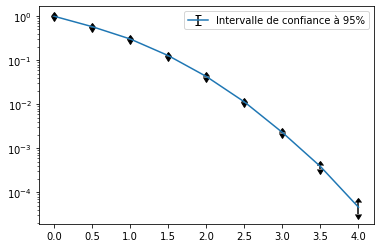

In [200]:
x=np.array([0,0.5,1,1.5,2,2.5,3,3.5,4])
y=np.array([1.0,0.579879,0.304379,0.127644,0.042899,0.01135,0.002294,0.000387,4.6e-05])
vars=np.array([0,0.24361934535899998,0.211732424359,0.111351009264,0.041058675799,0.0112211775,0.0022887375640000002,0.000386850231,4.5997884e-5])
errors=2*(vars/1000000)**0.5
#plt.plot(x,y)
plt.errorbar(x,y,yerr=errors,ecolor='black',uplims=True,lolims=True,label='Intervalle de confiance à 95%')
plt.yscale('log')
plt.legend()
plt.show()

In [210]:
val=3.933471785571152e-10
var=7.294036780743687e-13
N=30000000
error=2*((var/N)**0.5)
print(val-error,val+error)

8.149172527266616e-11 7.052026318415642e-10


In [ ]:
#TRAVAIL EN COURS :
#changement de variance local
import numpy as np

N=200000
sigma_c=1
r_c=1/57
v=1
r_a = 0
d1=5
d2=1
mu1=np.zeros(20)+d1/2
mu2=np.zeros(20)+d2/2
cov=np.zeros((20,20))
cov2=np.zeros((20,20))

for s in range(20):
    cov[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s+1)/sigma_c))
    cov2[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s+1)/sigma_c))
    for t in range(s):
        cov[t,s]=cov[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t+1)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)
        cov2[t,s]=cov2[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t+1)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)

alpha=0.8#2.3 pour d=5
for s in range(10,20):
    cov2[s,s]=alpha*(sigma_c**2)*(1-np.exp(-2*r_c*v*(s+1)/sigma_c))
    for t in range(10,s):
        cov2[t,s]=cov2[s,t]=alpha*(sigma_c**2)*(1-np.exp(-2*r_c*v*(t+1)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)   


X = np.random.multivariate_normal(mu1, cov2,size=N).T
Y = np.random.multivariate_normal(-mu1, cov2,size=N).T
mu1=mu1.reshape(20,1)
mu2=mu2.reshape(20,1)
Z=np.min(X-Y,axis=0)<0.1
inv_C1=np.linalg.inv(cov)
inv_C2=np.linalg.inv(cov2)
coef1=np.linalg.det(inv_C2)/np.linalg.det(inv_C1)
r=np.exp(0.5*(-xtcx(X-mu1,inv_C1)-xtcx(Y+mu1,inv_C1))-0.5*(-xtcx(X-mu1,inv_C2)-xtcx(Y+mu1,inv_C2)))/coef1
estim_mc_cum = np.cumsum(Z*r)/np.arange(1,N+1,dtype=float)
valeur_emp=np.mean(Z*r)

In [71]:

d=3.5 #distance entre les deux avions - trajectoire parallèle
N=100000
X1 = np.random.multivariate_normal(m, cov1,size=N)-d/2
Y1 = np.random.multivariate_normal(m, cov1,size=N)+d/2
X2 = np.random.multivariate_normal(m, cov2,size=N)-d/2
Y2 = np.random.multivariate_normal(m, cov2,size=N)+d/2
Z1=np.min(abs(Y1-X1),axis=1)<0.1
Z2=np.min(abs(Y2-X2),axis=1)<0.1
print(np.mean(Z1),np.mean(Z2))

0.00046 0.0031


In [21]:
sigma_c=1
r_c=1/57
v=1
l=14
alpha=2

m=np.zeros(20)
cov1=np.zeros((20,20))
cov2=np.zeros((20,20))
for s in range(20):
    cov1[s,s]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(s+1)/sigma_c))
    for t in range(s):
        cov1[t,s]=cov1[s,t]=(sigma_c**2)*(1-np.exp(-2*r_c*v*(t+1)/sigma_c))*np.exp(-r_c*v*(s-t)/sigma_c)
        
for s in range(20):
    if s>=l: cov2[s,s]=alpha*cov1[s,s]
    else: cov2[s,s]=cov1[s,s]
    for t in range(s):
        if t>=l: cov2[t,s]=cov2[s,t]=alpha*cov1[t,s]
        else: cov2[t,s]=cov2[s,t]=cov1[t,s]

In [23]:
N=200000
d=5
mu=np.zeros(20)+d/2
inv_C1=np.linalg.inv(cov1)
inv_C2=np.linalg.inv(cov2)
X = np.random.multivariate_normal(mu, cov2,size=N).T
Y = np.random.multivariate_normal(-mu, cov2,size=N).T
mu=mu.reshape(20,1)
Z=np.min(abs(X-Y),axis=0)<0.1
r=np.exp(0.5*(xtcx(X-mu,inv_C2)-xtcx(X-mu,inv_C1)+xtcx(Y+mu,inv_C2)-xtcx(Y+mu,inv_C1)))*(np.linalg.det(cov2)/np.linalg.det(cov1))
print(np.mean(Z*r),np.mean((Z*r)**2)-np.mean(Z*r)**2)

2.21660314575534e-08 8.198064218418064e-11


In [187]:
np.mean(r)

0.9950327802290021

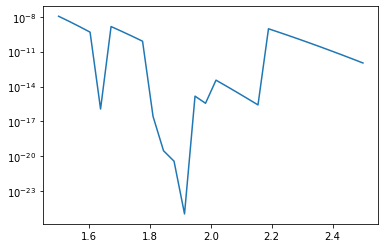

In [9]:
#choix de alpha
d=5
N=100000
alphas = np.linspace(1.5,2.5,30)
l=14
L=[]
mu=np.zeros(20)+d/2
X = np.random.multivariate_normal(np.zeros(20), cov1,size=N)
Y = np.random.multivariate_normal(np.zeros(20), cov1,size=N)
inv_C1=np.linalg.inv(cov1)
for alpha in alphas:
    cov2=np.zeros((20,20))
    for s in range(20):
        if s>=l: cov2[s,s]=alpha*cov1[s,s]
        else: cov2[s,s]=cov1[s,s]
        for t in range(s):
            if t>=l: cov2[t,s]=cov2[s,t]=alpha*cov1[t,s]
            else: cov2[t,s]=cov2[s,t]=cov1[t,s]
    mu=np.zeros(20)+d/2
    mu=mu.reshape(20,1)
    X_=scipy.linalg.sqrtm(cov2).dot(scipy.linalg.sqrtm(inv_C1).dot(X.T))+mu
    Y_=scipy.linalg.sqrtm(cov2).dot(scipy.linalg.sqrtm(inv_C1).dot(Y.T))-mu
    Z=np.min(abs(X_-Y_),axis=0)<0.1
    inv_C2=np.linalg.inv(cov2)
    r=np.exp(0.5*(xtcx(X_-mu,inv_C2)-xtcx(X_-mu,inv_C1)+xtcx(Y_+mu,inv_C2)-xtcx(Y_+mu,inv_C1)))*(np.linalg.det(cov2)/np.linalg.det(cov1))
    L.append(np.mean((Z*r)**2))
    
plt.plot(alphas,L)
plt.yscale('log')
plt.show()

In [163]:
X_-Y_

array([[3.5, 3.5, 3.5, ..., 3.5, 3.5, 3.5],
       [3.5, 3.5, 3.5, ..., 3.5, 3.5, 3.5],
       [3.5, 3.5, 3.5, ..., 3.5, 3.5, 3.5],
       ...,
       [3.5, 3.5, 3.5, ..., 3.5, 3.5, 3.5],
       [3.5, 3.5, 3.5, ..., 3.5, 3.5, 3.5],
       [3.5, 3.5, 3.5, ..., 3.5, 3.5, 3.5]])